In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import wordnet as wn
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:94% !important; }</style>"))
%matplotlib inline
import numpy as np
from datetime import datetime

In [3]:
df_or = pd.read_csv("./data/registro_historico_acumulado_del.csv",sep=";")
df_or = df_or[df_or.COMUNA==4]

In [4]:
def test_apply(x):
    try:
        return np.float32(x)
    except ValueError:
        return np.nan

df_or["PORCENTAJE_AVANCE"] = df_or["PORCENTAJE_AVANCE"].apply(test_apply)
df_or = df_or[~df_or["PORCENTAJE_AVANCE"].isnull()]
df_or = df_or[df_or["PORCENTAJE_AVANCE"].apply(lambda x: x>95.0)]
df_or["FECHA_FIN_INICIAL"] = df_or["FECHA_FIN_INICIAL"].apply(lambda x: datetime.strptime(x,"%d/%m/%Y").date())

In [5]:
x = df_or['FECHA_FIN_INICIAL']
y = df_or['PORCENTAJE_AVANCE']

In [6]:
import itertools
import operator
values = zip(x,y)
values = sorted([*values])
def accumulate(l):
    it = itertools.groupby(l, operator.itemgetter(0))
    for key, subiter in it:
        yield key, sum(1 for item in subiter) 
values = [*accumulate(values)]

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

[]

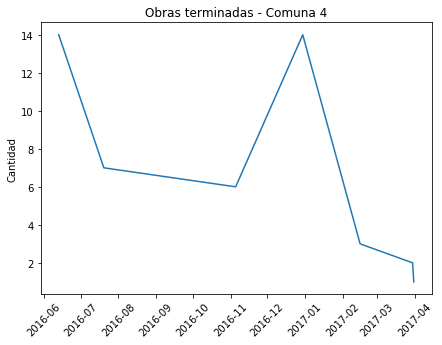

In [8]:
dates = [pd.to_datetime(d[0]) for d in values]
y = [d[1] for d in values]
plt.figure(figsize=(7,5))
plt.xticks(rotation=45)
sp = plt.plot(dates, y)
plt.title("Obras terminadas - Comuna 4")
plt.ylabel("Cantidad")
plt.plot()

In [9]:
df_barrios = pd.read_csv("data/barrios/barrios_.csv")
df_barrios["BARRIO"] = df_barrios["BARRIO"].apply(lambda x: x.lower())
df_barrios["COMUNA"] = df_barrios["COMUNA"].astype('int')

In [10]:
def avg_p(file):
    df_p = pd.read_csv(file)
    df_p["place_name"] = df_p["place_name"].apply(lambda x: str(x).lower())
    df_p["place_name"] = df_p["place_name"].apply(str)
    df_ = pd.merge(df_p, df_barrios, left_on = 'place_name', right_on = 'BARRIO')
    df_ = df_[df_["COMUNA"]==4]
    return df_["price_usd_per_m2"].dropna().mean()

In [111]:
lista = []
files = ["properati-AR-2016-06-01-properties-sell.csv","properati-AR-2016-07-01-properties-sell.csv","properati-AR-2016-08-01-properties-sell.csv","properati-AR-2016-09-01-properties-sell.csv","properati-AR-2016-10-01-properties-sell.csv","properati-AR-2016-11-01-properties-sell.csv","properati-AR-2016-12-01-properties-sell.csv","properati-AR-2017-01-01-properties-sell.csv","properati-AR-2017-02-01-properties-sell.csv","properati-AR-2017-03-01-properties-sell.csv","properati-AR-2017-04-01-properties-sell.csv"]
for f in files:
    lista.append(avg_p('./data/sell/'+f))
    print(lista[-1])

1551.41911468
1635.36157241
1590.66938642
1614.27172685
1627.1777301
1624.62433017
1643.14767922
1666.56060887
1680.27658913
1793.91013937
2045.55208953


<IPython.core.display.Javascript object>


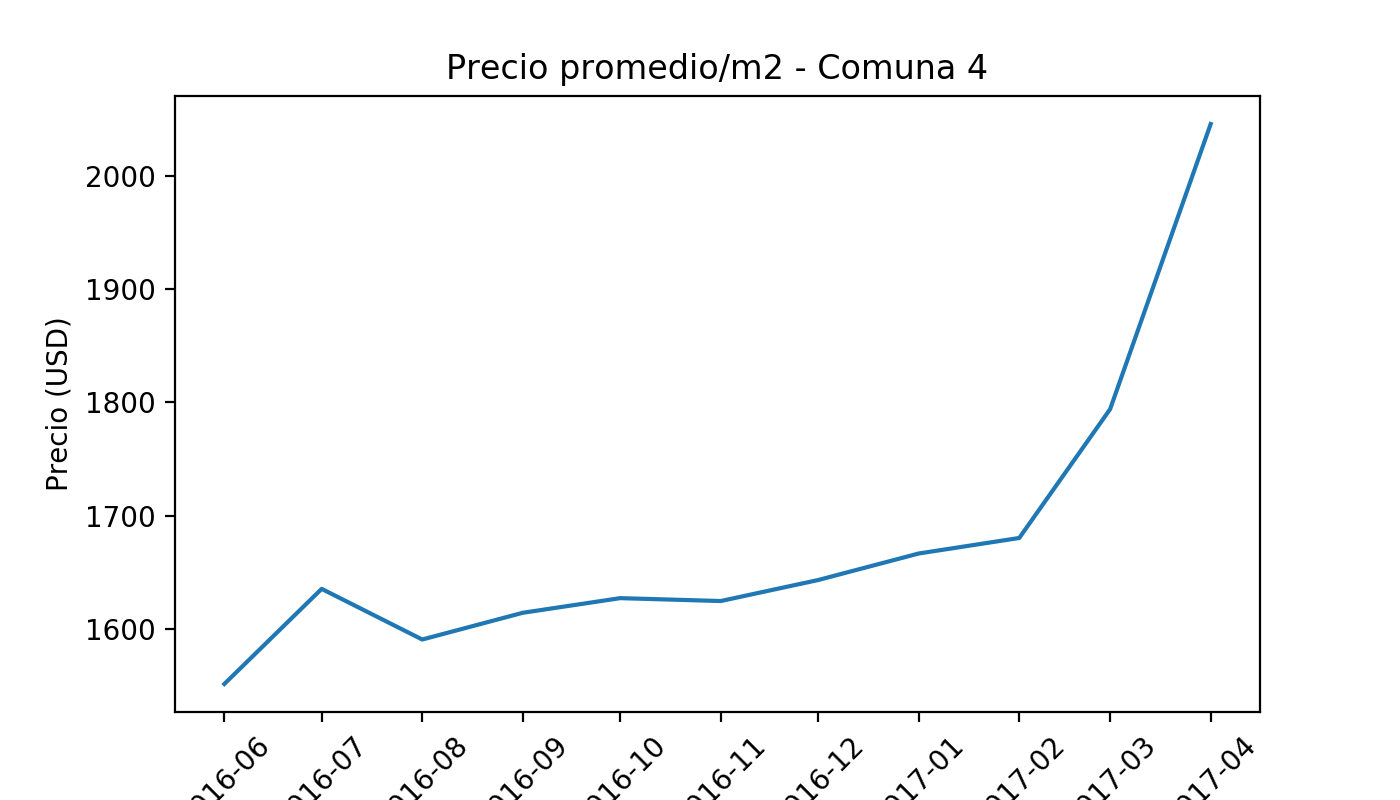

<IPython.core.display.Javascript object>


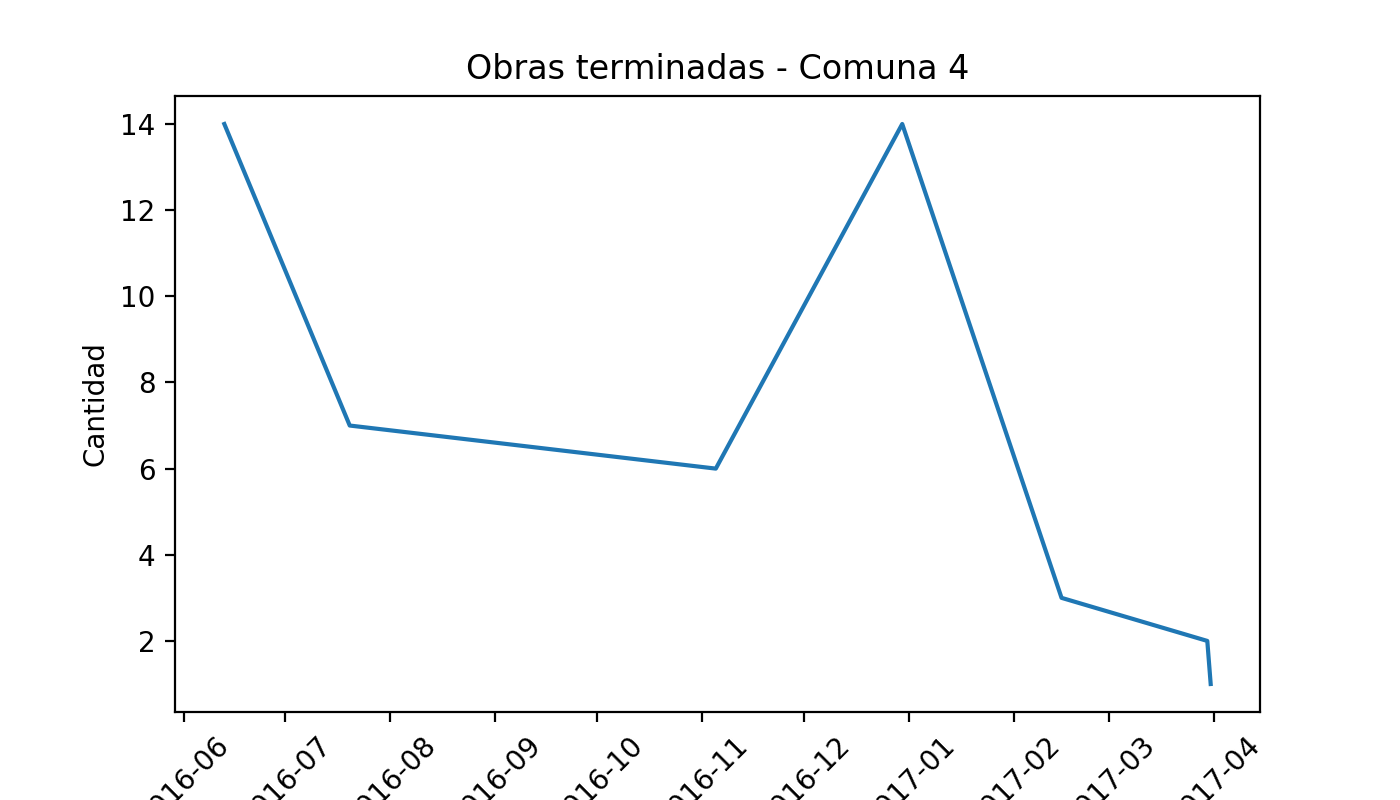

[]

In [132]:
x = [datetime.strptime(x,"%Y-%m-%d") for x in ["2016-06-01","2016-07-01","2016-08-01","2016-09-01","2016-10-01","2016-11-01","2016-12-01","2017-01-01","2017-02-01","2017-03-01","2017-04-01"]]
plt.figure(figsize=(7,4))
plt.xticks(rotation=45)
plt.title("Precio promedio/m2 - Comuna 4")
plt.ylabel("Precio (USD)")
plt.plot(x,lista)

plt.figure(figsize=(7,4))
plt.xticks(rotation=45)
sp = plt.plot(dates, y)
plt.title("Obras terminadas - Comuna 4")
plt.ylabel("Cantidad")

plt.plot()

In [144]:
df_change = pd.read_excel("./data/change/Changeorg - capital.xlsx")
df_change.head(5)

,title,ask,description,id,targeting_description,total_signature_count,total_signup_count,created_at,ps_signup,this_login,status,victory_date,top_tags
0,".@Soledad_Acunia Por mi discapacidad, me niega...","Por mi discapacidad, me niegan mi título. Quie...","<p><strong>Soy Alan, tengo Síndrome de Down. <...",5153758,Soledad Acuña,161868,34366.0,2015-12-15T18:08:50.000Z,2015-12-16T18:26:31.000Z,2016-05-01T00:39:34.000Z,1.0,NaN,education | discapacidad | accesibilidad | edu...
1,.@MauricioMacri No al recorte presupuestario d...,No al recorte presupuestario del Hospital Garr...,<p><strong>Como padre de un paciente y ciudada...,4295028,Horacio Rodriguez Larreta,81889,4580.0,2015-09-16T04:18:16.000Z,2015-03-21T00:17:39.000Z,2018-02-17T11:40:54.000Z,2.0,NaN,health | hospitales | salud
2,NO PIROTECNIA EN LA RURAL @calivillalonga @die...,CANCELEN EL SHOW DE PIROTECNIA EN LA RURAL @ca...,<p><strong>SE SUSPENDIERON LOS FUEGOS ARTIFICI...,2428221,"Horacio Rodriguez Larreta, Horacio Rodriguez L...",47130,8157.0,2014-12-30T04:53:32.000Z,2010-07-07T18:15:09.000Z,2018-02-27T20:01:02.000Z,3.0,2014-12-31T00:00:00.000Z,pirotecnia | animales
3,.@BAcomuna14 @PerezAleOk Por mi hijo Facu de 1...,"Por mi hijo Facundo de 1 año y 8 meses, quiere...",<p>Pido que por favor no saquen la arena de la...,8064554,Horacio Rodriguez Larreta,47067,298.0,2016-08-31T17:49:11.000Z,2015-08-10T18:49:02.000Z,2018-01-29T18:57:21.000Z,2.0,NaN,Hemofilia | plazas | Juegos infantiles | derec...
4,Liberen a la orangutana Sandra del Zoo de Buen...,Liberen a la orangutana Sandra del Zoo de Buen...,<p><strong>La orangutana Sandra sigue encerrad...,4562832,Horacio Rodriguez Larreta,45232,915.0,2015-10-23T19:17:07.000Z,2015-01-24T02:52:42.000Z,2018-02-23T17:22:50.000Z,1.0,NaN,animales


In [149]:
len(df_change)

1283

In [158]:
keywords = [ 'alquileres', 'arquitectura', 'asociacion catalinas sur', 'av la plata', 'balbin', 'belgrano', 'boedo', 'caba', 'carril exclusivo', 'ciclismo urbano', 'comuna 7', 'edificios', 'embotellamiento', 'espacios públicos', 'espacios verdes', 'estacionamiento medido', 'expropiacion', 'gasto publico racional', 'hospitales', 'hospitales dignos', 'hospitales publicos', 'infraestructura municipal', 'la rural', 'metrobus', 'monumentos', 'movilidad', 'movilidad sustentable', 'movilidadd', 'movilidadreducida', 'museos', 'nuñez', 'obras públicas', 'parque chacabuco', 'parque sarmiento', 'parques', 'peatonal', 'plaza', 'plazas', 'plazas y parques', 'pompeya', 'saavedra', 'semaforos', 'servicio público', 'servicios hospitalarios', 'servicios publicos', 'subte', 'subtes', 'temas edilicos', 'tunel', 'urbanismo', 'urbanizaciòn', 'via publica', 'vialidad', 'vias publicas', 'villa crespo', 'viviendas']
df_change_ = df_change[df_change["top_tags"].apply(lambda x: any(word in [*map(lambda y: y.strip().lower(),str(x).split("|"))] for word in keywords))]

In [160]:
df_change_

,title,ask,description,id,targeting_description,total_signature_count,total_signup_count,created_at,ps_signup,this_login,status,victory_date,top_tags
1,.@MauricioMacri No al recorte presupuestario d...,No al recorte presupuestario del Hospital Garr...,<p><strong>Como padre de un paciente y ciudada...,4295028,Horacio Rodriguez Larreta,81889,4580.0,2015-09-16T04:18:16.000Z,2015-03-21T00:17:39.000Z,2018-02-17T11:40:54.000Z,2.0,NaN,health | hospitales | salud
3,.@BAcomuna14 @PerezAleOk Por mi hijo Facu de 1...,"Por mi hijo Facundo de 1 año y 8 meses, quiere...",<p>Pido que por favor no saquen la arena de la...,8064554,Horacio Rodriguez Larreta,47067,298.0,2016-08-31T17:49:11.000Z,2015-08-10T18:49:02.000Z,2018-01-29T18:57:21.000Z,2.0,NaN,Hemofilia | plazas | Juegos infantiles | derec...
5,.@HoraciorLarreta @LegisCABA Que se extienda e...,Subterráneos de Buenos Aires: Que se extienda ...,<p>Hola mi nombre es Guido y vivo en Flores. <...,1167596,Horacio Rodriguez Larreta,34770,3701.0,2013-06-06T14:55:05.000Z,2013-06-06T14:53:28.000Z,2018-02-28T15:20:21.000Z,2.0,NaN,trasportation | transporte | subtes | environm...
6,HORACIO RODRIGUEZ LARRETA: COLOQUEN UN TOMÓGRA...,COLOQUEN UN TOMÓGRAFO EN EL HOSPITAL ZUBIZARRETA,<p>Los tomógrafos son aparatos importantísimos...,4186668,"HORACIO RODRIGUEZ LARRETA, Dra. Ana Maria Bou ...",28346,365.0,2015-09-07T12:16:04.000Z,2015-09-07T11:47:37.000Z,2018-01-16T03:12:27.000Z,2.0,NaN,health | hospitales | salud | salud publica | ...
12,Compromiso público para cumplir con la Ley de ...,Compromiso para cumplir con Ley de Residencias...,<p><strong>Los médicos no podemos seguir traba...,3661675,"Mauricio Macri, Horacio Rodriguez Larreta, Gra...",18737,6071.0,2015-06-28T23:33:27.000Z,2014-05-22T01:09:49.000Z,2018-01-14T03:38:54.000Z,2.0,NaN,health | hospitales | salud
17,.@HoracioRLarreta @AGC_control Cierre del Boli...,Cierre del Boliche Cocodrilo frente al Hospita...,El Boliche Cocodrilo situado sobre la calle Ga...,7945568,Horacio Rodriguez Larreta,14354,379.0,2016-08-14T21:12:02.000Z,2016-08-14T21:11:58.000Z,2018-01-13T01:11:16.000Z,2.0,NaN,health | hospitales | niños | salud
21,Espacios Verdes: ¿Para cuándo la Plaza Clemente?,Espacios Verdes: NO al shopping ILEGAL de Cole...,<p>Según los datos de la Dirección General de ...,12869150,"Gustavo Acevedo, Ariel Gustavo Lasge, Eduardo ...",11582,846.0,2017-12-25T19:07:24.000Z,2014-01-07T22:32:32.000Z,2018-03-01T18:30:20.000Z,1.0,NaN,espacios verdes | espacios públicos | Compromi...
30,Que bajen las expensas!,#BajemosLasExpensas,"<p>Muchos Consorcistas pagan expensas caras, p...",12172195,"Mauricio Macri, Horacio Rodríguez Larreta",7853,910.0,2017-09-05T00:47:59.000Z,2015-09-12T16:08:20.000Z,2018-03-01T08:43:05.000Z,1.0,NaN,consumidores | alquileres
36,@gcba @disfrutaEP Unidad de Primeros Auxilios ...,Eduardo Cenzon: Unidad de Primeros Auxilios en...,<p>La RESERVA ECOLÓGICA COSTANERA SUR DE LA CI...,1369070,Horacio Rodriguez Larreta,7186,363.0,2013-11-26T22:54:00.000Z,2013-11-26T22:39:03.000Z,2017-08-24T17:50:23.000Z,2.0,NaN,espacios verdes | caba | responsabilidad guber...
44,.@francomoccia @horaciorlarreta Accesibilidad ...,"SUBTE Línea ""E"" SIN DISCRIMINACION !! Que se c...",<p>Miles de personas con limitaciones motrices...,10451234,"Claudia Viviana Mamoe, Horacio Rodríguez Larre...",4914,43.0,2017-02-23T12:53:29.000Z,2013-03-21T17:53:50.000Z,2018-02-28T18:53:48.000Z,1.0,NaN,discapacidad | accesibilidad | salud | derecho...


<IPython.core.display.Javascript object>


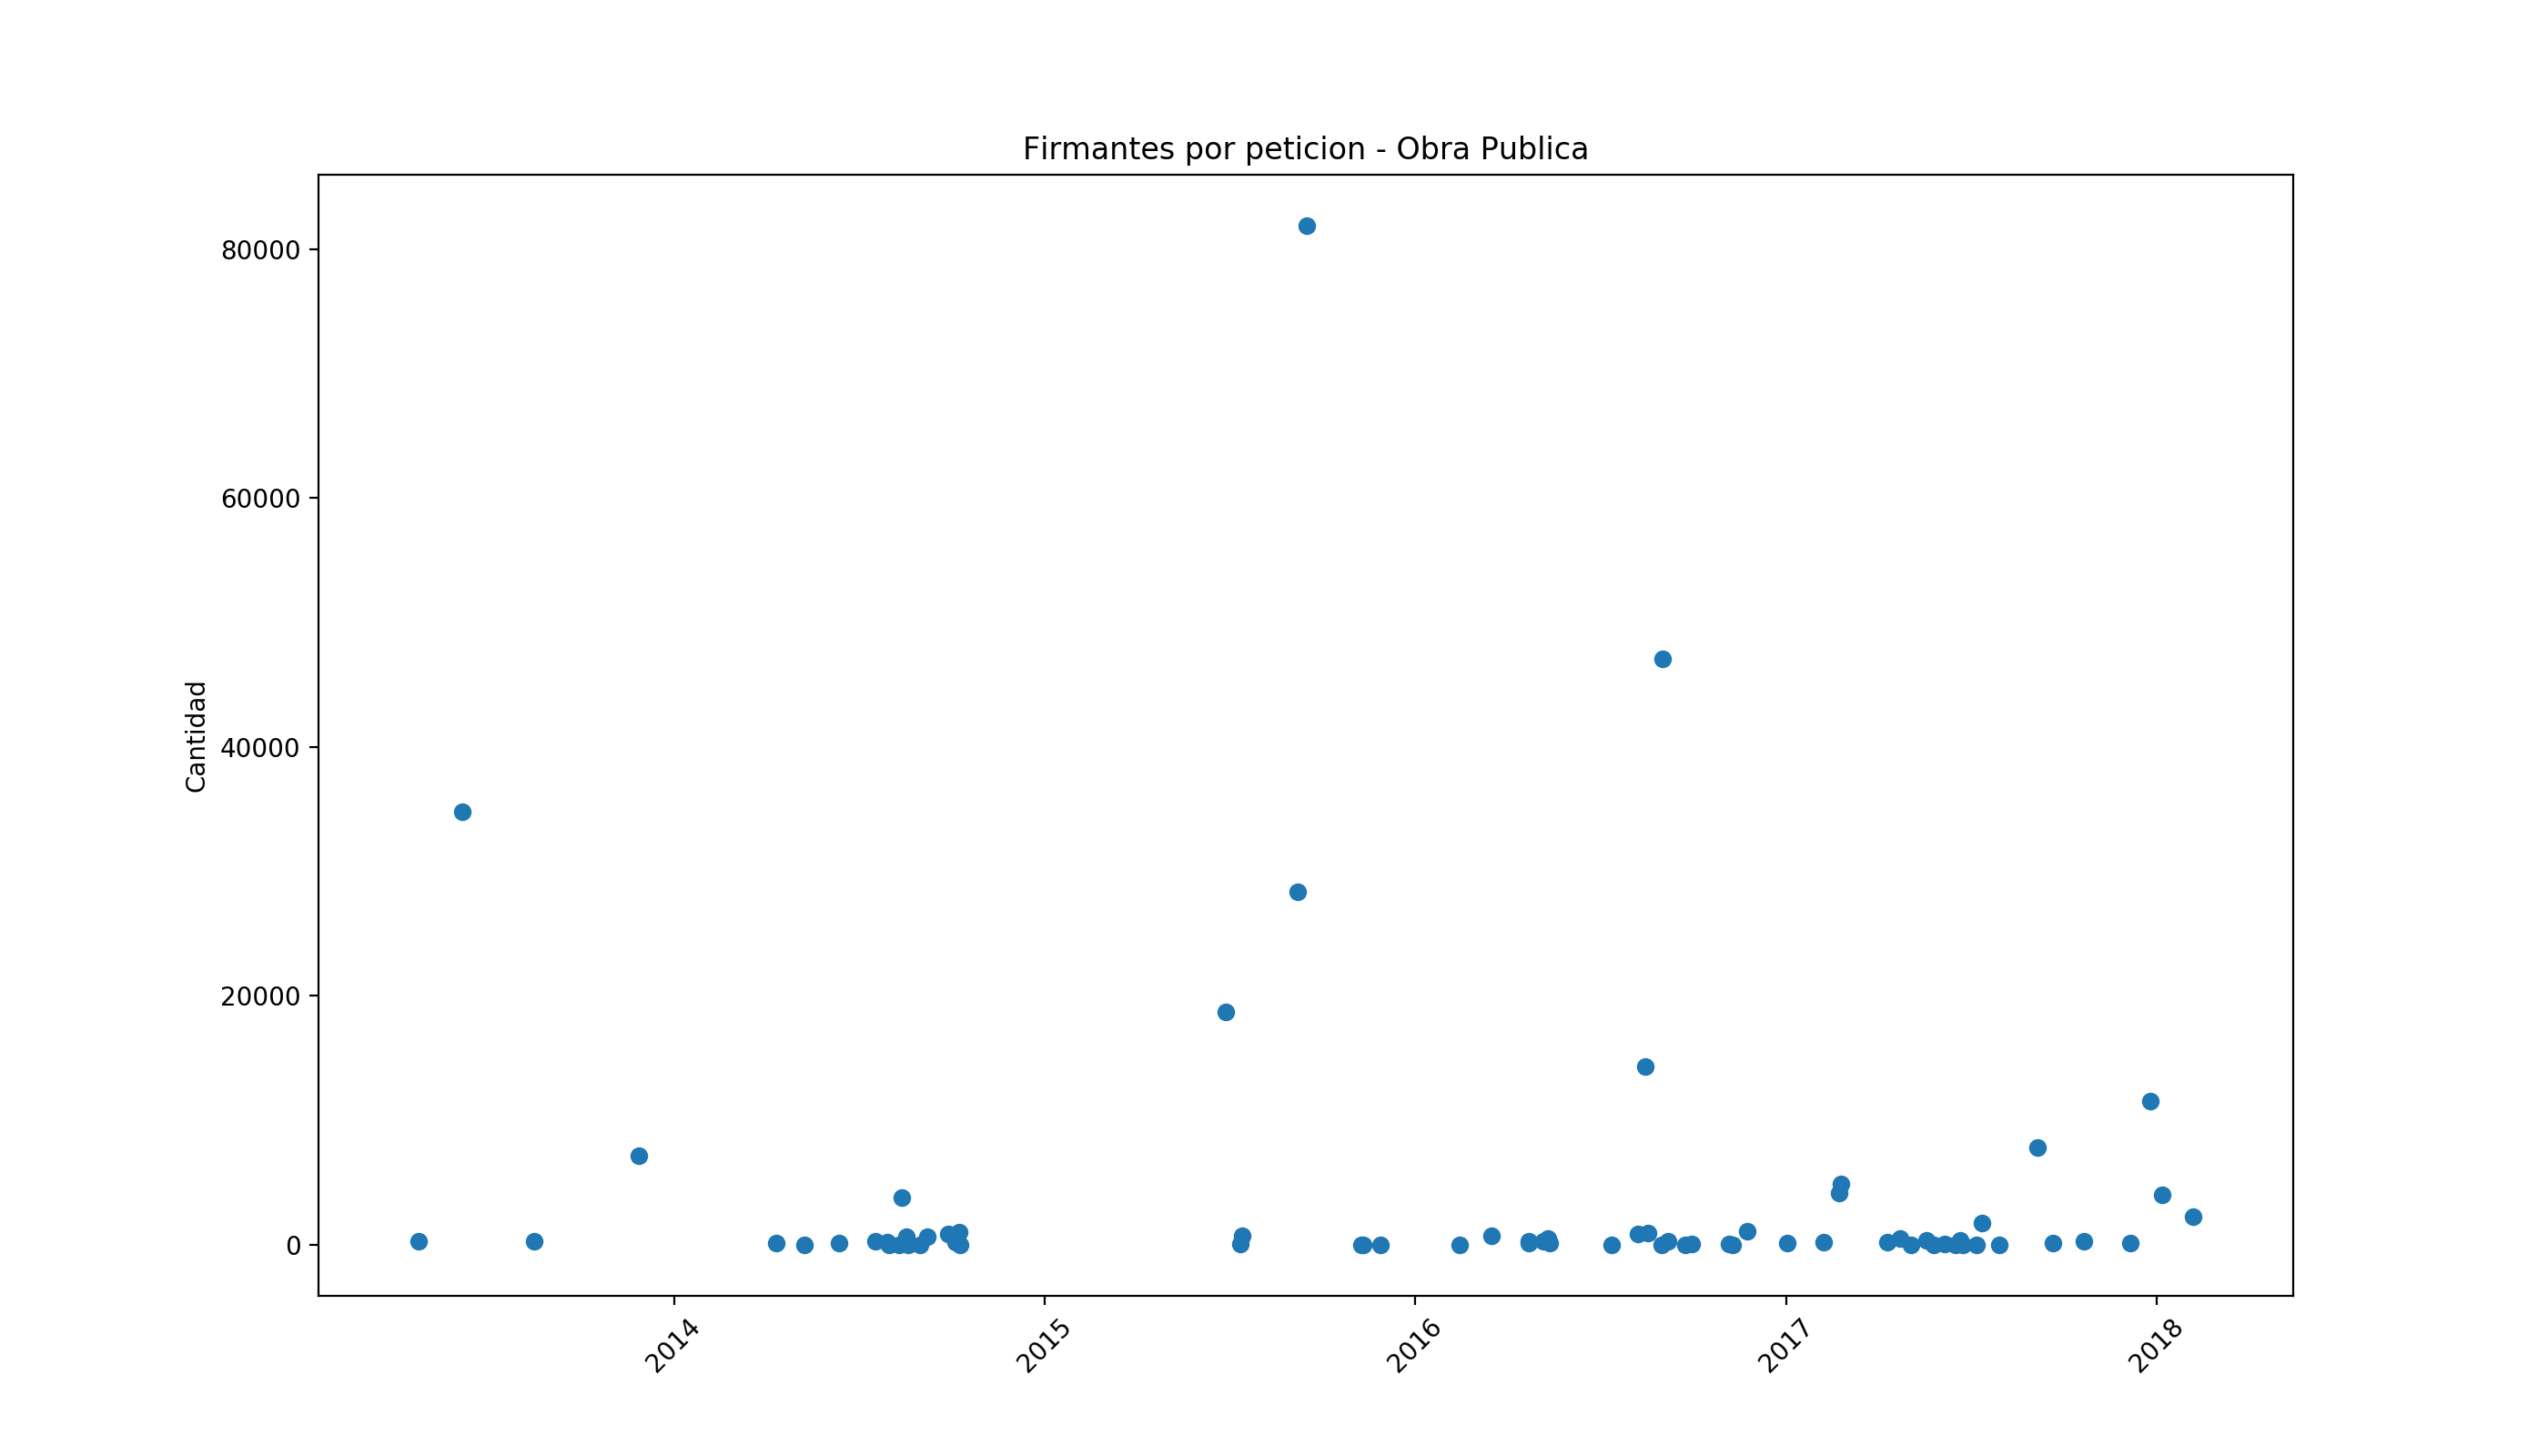

[]

In [166]:
fechas_peticiones = [pd.to_datetime(d) for d in df_change_.created_at]
signatures = df_change_.total_signature_count

plt.figure(figsize=(14,8))
plt.xticks(rotation=45)
sp = plt.scatter(fechas_peticiones, signatures)
plt.title("Firmantes por peticion - Obra Publica")
plt.ylabel("Cantidad")

plt.plot()

# Revalorizacion de barrios por obra publica

## Como incide la ejecucion de una obra publica en el valor inmobiliario de las propiedades

### El caso de la comuna 4


[]

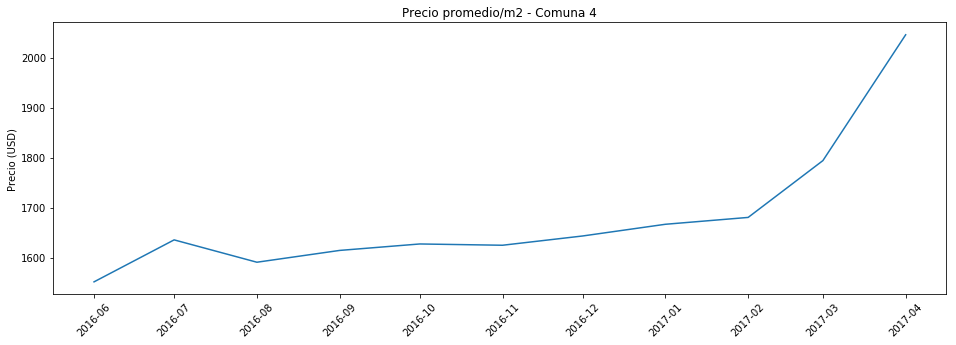

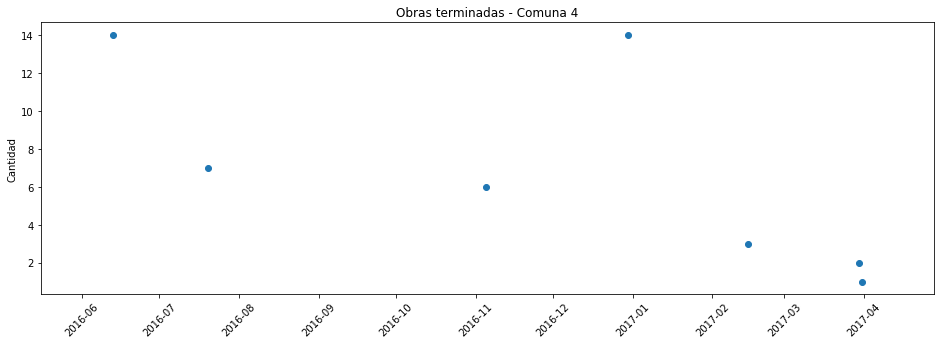

In [196]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=45)
plt.title("Precio promedio/m2 - Comuna 4")
plt.ylabel("Precio (USD)")
plt.plot(x,lista)

plt.figure(figsize=(16,5))
plt.xticks(rotation=45)
sp = plt.scatter(dates, y)
plt.title("Obras terminadas - Comuna 4")
plt.ylabel("Cantidad")

plt.plot()

## Peticiones de Obra Publica en change.org

[]

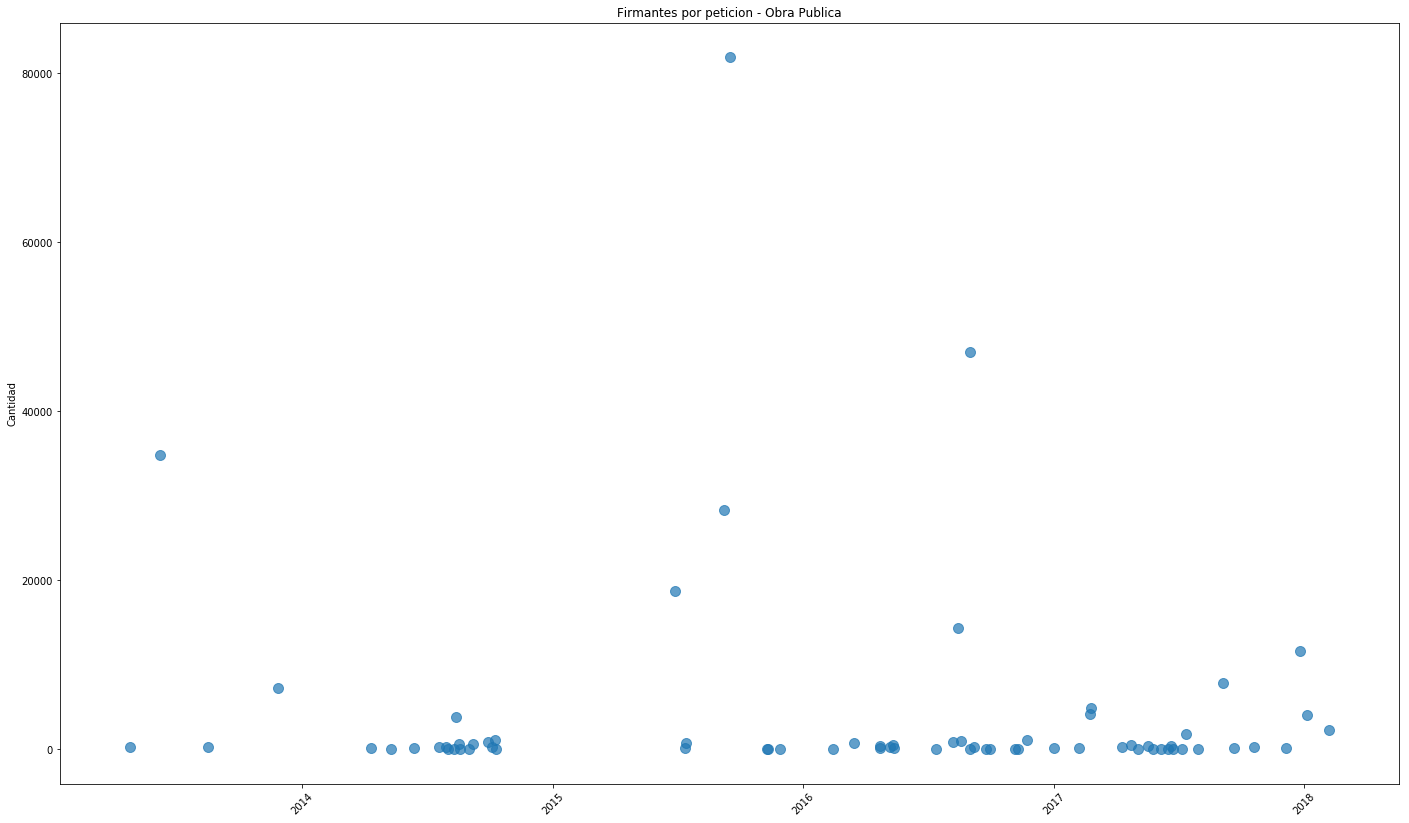

In [194]:
fechas_peticiones = [pd.to_datetime(d) for d in df_change_.created_at]
signatures = df_change_.total_signature_count

plt.figure(figsize=(24,14))
plt.xticks(rotation=45)
sp = plt.scatter(fechas_peticiones, signatures, s=100, alpha = 0.7)
plt.title("Firmantes por peticion - Obra Publica")
plt.ylabel("Cantidad")

plt.plot()

[]

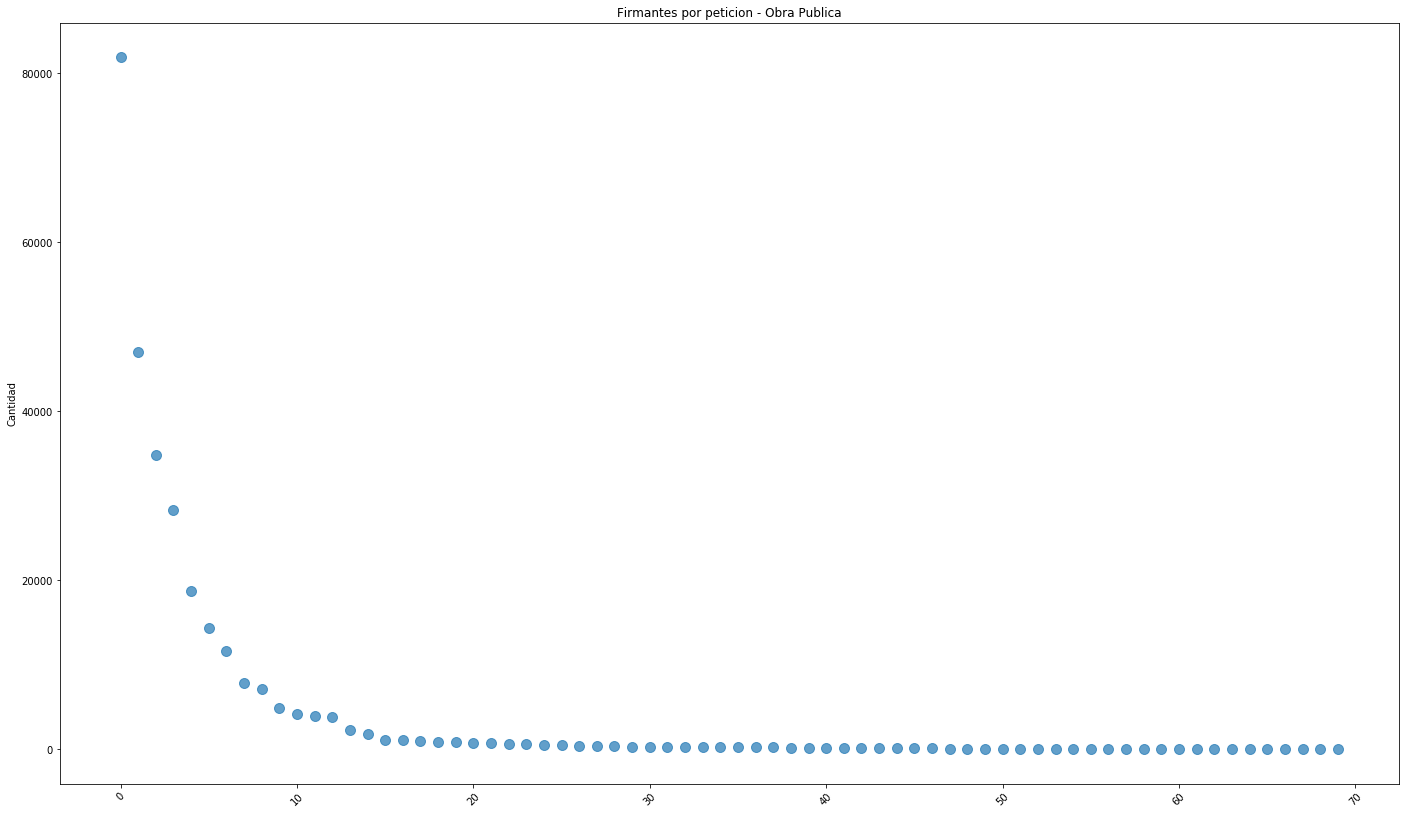

In [195]:
df_change_2 = df_change_.sort_values('total_signature_count',ascending=False)
fechas_peticiones = [pd.to_datetime(d) for d in df_change_2.created_at]
signatures = df_change_2.total_signature_count

plt.figure(figsize=(24,14))
plt.xticks(rotation=45)
sp = plt.scatter(range(len(signatures)), signatures, s=100, alpha = 0.7)
plt.title("Firmantes por peticion - Obra Publica")
plt.ylabel("Cantidad")

plt.plot()

## Puntos a mejorar
* Cantidad de votos por comuna
* Correlacion entre obras y precio
* Busqueda de peticiones relacionadas a obra publica